## Set Up

In [ ]:
!pip install scikit-learn==0.22.2.post1

     |████████████████████████████████| 7.1 MB 4.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.2.post1 which is incompatible.


In [ ]:
cd /content/drive/MyDrive/MBKM RISET/RISET_1

/content/drive/MyDrive/MBKM RISET/RISET_1


In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/italojs/facial-landmarks-recognition/master/shape_predictor_68_face_landmarks.dat \
    -O shape_predictor_68_face_landmarks.dat

--2021-12-27 06:46:31--  https://raw.githubusercontent.com/italojs/facial-landmarks-recognition/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   192MB/s    in 0.5s    

2021-12-27 06:46:32 (192 MB/s) - ‘shape_predictor_68_face_landmarks.dat’ saved [99693937/99693937]



In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
##from imutils import face_utils
##import imutils
import numpy as np
import collections
import dlib
import cv2

%matplotlib inline 
from matplotlib import pyplot as plt 
import pylab 
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

## Preprocessing

In [ ]:
def cropping(image,num):
  rect = detector(image)[0]
  sp = predictor(image, rect)
  landmarks = np.array([[p.x, p.y] for p in sp.parts()])
  x = []
  y_alis = []
  y = []
  w = []
  h = []

  x.append(landmarks[1][0])
  y_alis.append(landmarks[17][1])
  y_alis.append(landmarks[18][1])
  y_alis.append(landmarks[23][1])
  y_alis.append(landmarks[24][1])
  w.append(landmarks[15][0])
  h.append(landmarks[8][1])
  y.append(min(y_alis))

  if num==0:
    crop_img = image[y[0]:h[0], x[0]+10:w[0]]
  elif num ==1:
    crop_img = image[y[0]:h[0], x[0]:w[0]]
  
  return crop_img

def preprocessing (image,sig,size_x,size_y,num):
  offset = 20
  base_image = cv2.imread(image)
  grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
  crop_img = cropping(grey,num)
  face_pre = cv2.GaussianBlur(crop_img, ksize=(0, 0), sigmaX=sig, borderType=cv2.BORDER_REPLICATE)
  face = np.double(cv2.resize(face_pre,(size_x,size_y)))
  
  return face

In [ ]:
path_live_background = "/content/drive/MyDrive/MBKM RISET/RISET_1/SpecDiff_in_house_database_sample/data/live/ID05/0_bg.jpg"
path_live_flash = "/content/drive/MyDrive/MBKM RISET/RISET_1/SpecDiff_in_house_database_sample/data/live/ID05/0_flash.jpg"
path_spoof_flash = "/content/drive/MyDrive/MBKM RISET/RISET_1/Example1_spoof_flash.JPG"
path_spoof_background = "/content/drive/MyDrive/MBKM RISET/RISET_1/Example1_spoof_background.JPG"

In [ ]:
path_live_flash = "/content/js_flash.jpg"
path_live_background = "/content/js_bg.jpg"
path_spoof_flash = "/content/drive/MyDrive/MBKM RISET/RISET_1/SpecDiff_in_house_database_sample/data/spoof/ID00/000_6386.jpg"
path_spoof_background = "/content/drive/MyDrive/MBKM RISET/RISET_1/SpecDiff_in_house_database_sample/data/spoof/ID00/000_6387.jpg"

In [ ]:
sigma = 5
size_x = 100
size_y = 100
live_flash = preprocessing(path_live_flash,sigma,size_x,size_y,0)
live_background = preprocessing(path_live_background,sigma,size_x,size_y,1)
spoof_flash = preprocessing(path_spoof_flash,sigma,size_x,size_y,1)
spoof_background = preprocessing(path_spoof_background,sigma,size_x,size_y,1)

(-0.5, 99.5, 99.5, -0.5)

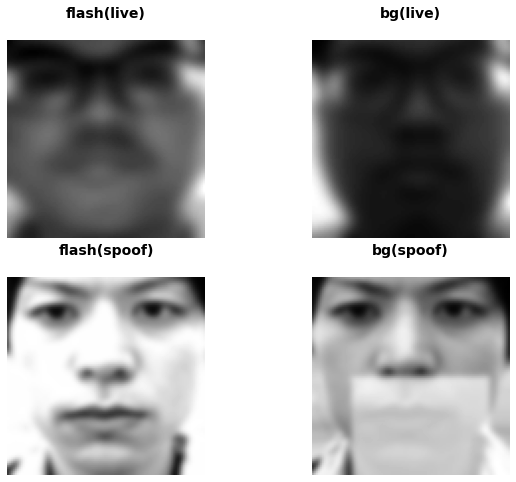

In [ ]:
title_fontdict = {
  'fontsize': 14,
  'fontweight': 'bold'
}

ax = plt.subplot(2, 2, 1)
plt.title('flash(live)\n', fontdict=title_fontdict)
plt.imshow(live_flash, "gray")
plt.axis('off')

ax = plt.subplot(2, 2, 2)
plt.title('bg(live)\n', fontdict=title_fontdict)
plt.imshow(live_background, "gray")
plt.axis('off')

ax = plt.subplot(2, 2, 3)
plt.title('flash(spoof)\n', fontdict=title_fontdict)
plt.imshow(spoof_flash, "gray")
plt.axis('off')

ax = plt.subplot(2, 2, 4)
plt.title('bg(spoof)\n', fontdict=title_fontdict)
plt.imshow(spoof_background, "gray")
plt.axis('off')

## Extraction  Diffuse and Specular Reflection

In [ ]:
def feature(flash,background):
  a = flash - background
  b = flash + background
  c = a/b
  trans = np.transpose(c)
  feat_vec = np.reshape(trans, (trans.size,))
  feat_vec = np.nan_to_num(feat_vec)
  return feat_vec,c

In [ ]:
live,img_live = feature(live_flash, live_background)
spoof,img_spoof = feature(spoof_flash, spoof_background)

(-0.5, 99.5, 99.5, -0.5)

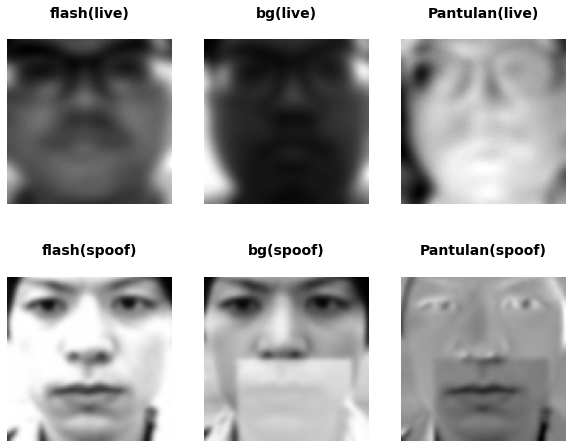

In [ ]:
ax = plt.subplot(2, 3, 1)
plt.title('flash(live)\n', fontdict=title_fontdict)
plt.imshow(live_flash, "gray")
plt.axis('off')

ax = plt.subplot(2, 3, 2)
plt.title('bg(live)\n', fontdict=title_fontdict)
plt.imshow(live_background, "gray")
plt.axis('off')

ax = plt.subplot(2, 3, 3)
plt.title('Pantulan(live)\n', fontdict=title_fontdict)
plt.imshow(img_live, "gray")
plt.axis('off')

ax = plt.subplot(2, 3, 4)
plt.title('flash(spoof)\n', fontdict=title_fontdict)
plt.imshow(spoof_flash, "gray")
plt.axis('off')

ax = plt.subplot(2, 3, 5)
plt.title('bg(spoof)\n', fontdict=title_fontdict)
plt.imshow(spoof_background, "gray")
plt.axis('off')

ax = plt.subplot(2, 3, 6)
plt.title('Pantulan(spoof)\n', fontdict=title_fontdict)
plt.imshow(img_spoof, "gray")
plt.axis('off')

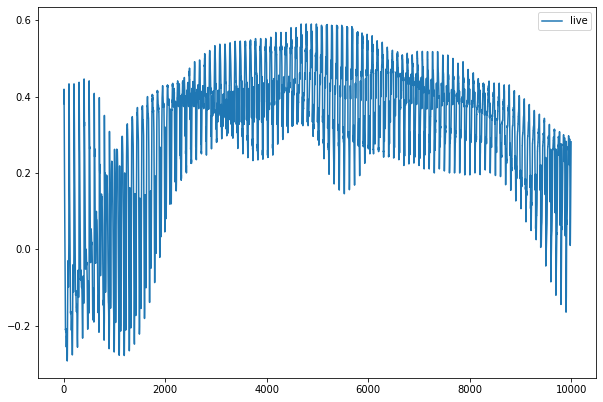

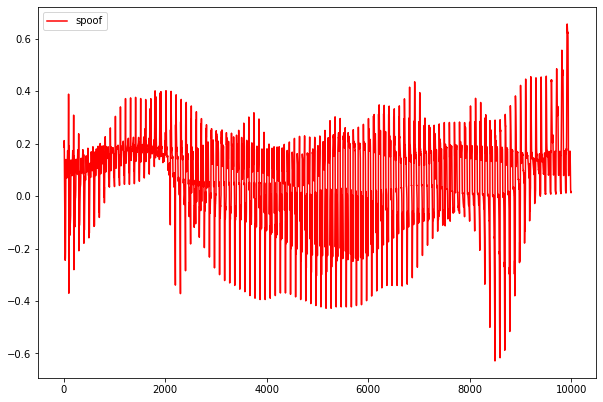

In [ ]:
pylab.rcParams['figure.figsize'] = (10.0, 15.0)

ax = plt.subplot(2, 1, 1)
plt.plot(np.squeeze(live),label = "live") 
plt.legend()
plt.show()

ax = plt.subplot(2, 1, 2)
plt.plot(np.squeeze(spoof),label = "spoof", color = 'red') 
plt.legend()
plt.show()


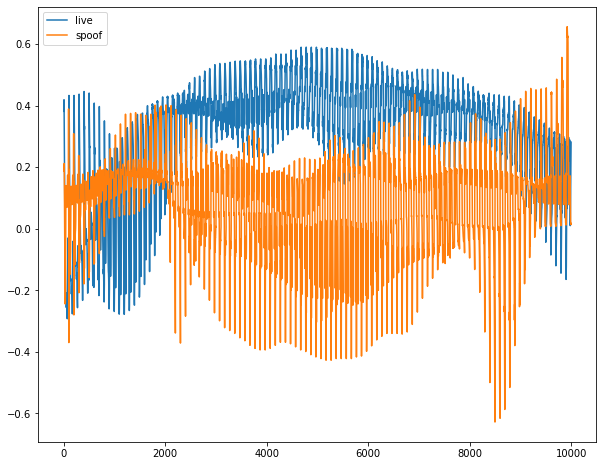

In [ ]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(np.squeeze(live),label = "live") 
plt.plot(np.squeeze(spoof),label = "spoof")
plt.legend()
plt.show()